In [148]:
pip install gensim

In [149]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [150]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [151]:
from gensim.models import Word2Vec

In [152]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'I like eating bananas and apples.',
    'Natural language processing is a fascinating field.'
]

In [153]:
from nltk.tokenize import word_tokenize

In [154]:
final_data = []
for sent in sentences:
  final_data.append(word_tokenize(sent))

In [155]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'bananas', 'and', 'apples', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [156]:
model = Word2Vec(final_data, min_count = 1, vector_size = 10)# min_count = 1: This parameter specifies the minimum frequency of a word for it to be considered during training. model

In [157]:
model.wv['apples'] # to access word vector

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [158]:
model.wv['bananas']

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [159]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [160]:
def get_embedding(word):
  try:
    word_embedding = model.wv[word]
    print('Word Embedding for', word, 'is:', word_embedding)
  except :
    print('Word Embedding for', word, 'is not available in the model.')

In [161]:
get_embedding('cherry')

Word Embedding for cherry is not available in the model.


In [162]:
get_embedding('fox')

Word Embedding for fox is: [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [163]:
from sklearn.metrics.pairwise import cosine_similarity

In [164]:
cosine_similarity([model.wv['dog']], [model.wv['fox']])

array([[0.2238495]], dtype=float32)

In [165]:
cosine_similarity(model.wv['apples'].reshape(1, -1), model.wv['bananas'].reshape(1, -1))

array([[0.18977958]], dtype=float32)

In [166]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [167]:
from nltk.corpus import abc
sents = abc.sents()# these sents are already present in list of list form

In [168]:

len(sents)

29059

In [169]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [170]:
model = Word2Vec(sents, min_count = 1, vector_size = 10)

In [171]:
len(model.wv.key_to_index)

31885

In [172]:
cosine_similarity(model.wv['are'].reshape(1, -1), model.wv['is'].reshape(1, -1))

array([[0.68271273]], dtype=float32)

### to see the most similar words w.r.t. some word

In [173]:
model.wv.most_similar('company')

[('inquiry', 0.95954829454422),
 ('group', 0.9504831433296204),
 ('report', 0.9504619836807251),
 ('government', 0.9493115544319153),
 ('Dept', 0.9491788148880005),
 ('Government', 0.9481467008590698),
 ('slabs', 0.9460761547088623),
 ('disband', 0.9387285113334656),
 ('research', 0.9366471171379089),
 ('Court', 0.9356266260147095)]

In [174]:
model.wv.most_similar('government')

[('research', 0.9698672890663147),
 ('investigated', 0.962807297706604),
 ('Anticipation', 0.9579981565475464),
 ('calling', 0.9519386887550354),
 ('company', 0.9493114948272705),
 ('epic', 0.9452822208404541),
 ('Court', 0.9398175477981567),
 ('group', 0.9390406608581543),
 ('new', 0.9388572573661804),
 ('findings', 0.9382190108299255)]

In [175]:
cosine_similarity(model.wv['company'].reshape(1, -1), model.wv['government'].reshape(1, -1))

array([[0.94931155]], dtype=float32)

## read the data and train Word2Vec

In [176]:
import pandas as pd

In [177]:
data = pd.read_json('/content/drive/MyDrive/intents.json')

or

In [178]:
import json

In [179]:
with open('/content/drive/MyDrive/intents.json') as f:
  data = json.load(f)

In [180]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [181]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [182]:
data[3]

{'tag': 'hoursopening',
 'patterns': ['What hours are you open?',
  'Tell your opening time?',
  'When are you open?',
  'Just your timing please'],
 'responses': ["We're open every day 8am-7pm",
  'Our office hours are 8am-7pm every day',
  'We open office at 8 am and close at 7 pm']}

In [183]:
df = pd.DataFrame(data)

In [184]:
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [185]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [186]:
df['patterns'].apply(' '.join)

,patterns
0,Hi How are you Is any one to talk? Hello hi ar...
1,Bye See you later Goodbye I will come back soon
2,Thanks for helping me Thank your guidance That...
3,What hours are you open? Tell your opening tim...
4,Can I pay using credit card? Can I pay using ...


In [187]:
df['patterns'] = df['patterns'].apply(' '.join)

In [188]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import Word # unlike WordNetLemmatizer we dont have to instantiate it is already in object form
import string
stop = stopwords.words('english')

In [190]:
# df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x.lower() for x in word_tokenize(x)))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in word_tokenize(x.lower()) if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\w\s]', '')
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x for x in word_tokenize(x) if x not in stop))
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(Word(x).lemmatize(pos = 'v') for x in word_tokenize(x)))

In [191]:
df['patterns']

,patterns
0,hi one talk hello hi available
1,bye see later goodbye come back soon
2,thank help thank guidance 's helpful kind
3,hours open tell open time open time please
4,pay use credit card pay use mastercard pay use...


In [192]:
model = Word2Vec(sents, min_count = 1, vector_size = 10)

In [193]:
d = []
for i in df['patterns']:
  d.append(word_tokenize(i))

In [194]:
d1 = []
for i, j in df.iterrows():
  d1.append([word_tokenize(j[1])])

<ipython-input-194-d577f8f8cb4e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d1.append([word_tokenize(j[1])])


In [195]:
d1

[[['hi', 'one', 'talk', 'hello', 'hi', 'available']],
 [['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon']],
 [['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind']],
 [['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please']],
 [['pay',
   'use',
   'credit',
   'card',
   'pay',
   'use',
   'mastercard',
   'pay',
   'use',
   'cash']]]

In [196]:
model = Word2Vec(d, min_count = 1, vector_size = 2)

In [197]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [198]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [199]:
model.wv.key_to_index

{'pay': 0,
 'open': 1,
 'use': 2,
 'hi': 3,
 'time': 4,
 'thank': 5,
 'hello': 6,
 'talk': 7,
 'soon': 8,
 'one': 9,
 'bye': 10,
 'see': 11,
 'later': 12,
 'goodbye': 13,
 'come': 14,
 'back': 15,
 'available': 16,
 'cash': 17,
 'help': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hours': 23,
 'tell': 24,
 'please': 25,
 'credit': 26,
 'card': 27,
 'guidance': 28}

In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
words = list(model.wv.key_to_index.keys())

In [202]:
words

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [203]:
vector = []
for word in words:
  vect = model.wv[word]
  vector.append(vect)

In [204]:
vector

[array([-0.02651391,  0.01156701], dtype=float32),
 array([0.25526112, 0.45090607], dtype=float32),
 array([-0.46515337, -0.35582092], dtype=float32),
 array([0.32294363, 0.4486494 ], dtype=float32),
 array([-0.2507714 , -0.18816859], dtype=float32),
 array([ 0.36877084, -0.07690762], dtype=float32),
 array([-0.22683066,  0.32770258], dtype=float32),
 array([-0.24300802, -0.09080088], dtype=float32),
 array([0.14380899, 0.04965185], dtype=float32),
 array([-0.41426075, -0.4724409 ], dtype=float32),
 array([0.36533156, 0.25365862], dtype=float32),
 array([0.3375778, 0.0384436], dtype=float32),
 array([ 0.31745085, -0.17025824], dtype=float32),
 array([-0.0474354 ,  0.28846955], dtype=float32),
 array([-0.37631938, -0.19679889], dtype=float32),
 array([-0.37573153, -0.04656664], dtype=float32),
 array([ 0.47690594, -0.36595833], dtype=float32),
 array([-0.11668843, -0.09688705], dtype=float32),
 array([ 0.40388986, -0.29662946], dtype=float32),
 array([ 0.00213489, -0.23767537], dtype=fl

In [205]:
df1 = pd.DataFrame(vector, columns = ['x', 'y'], index = words)

In [208]:
df1

,x,y
pay,-0.026514,0.011567
open,0.255261,0.450906
use,-0.465153,-0.355821
hi,0.322944,0.448649
time,-0.250771,-0.188169
thank,0.368771,-0.076908
hello,-0.226831,0.327703
talk,-0.243008,-0.090801
soon,0.143809,0.049652
one,-0.414261,-0.472441


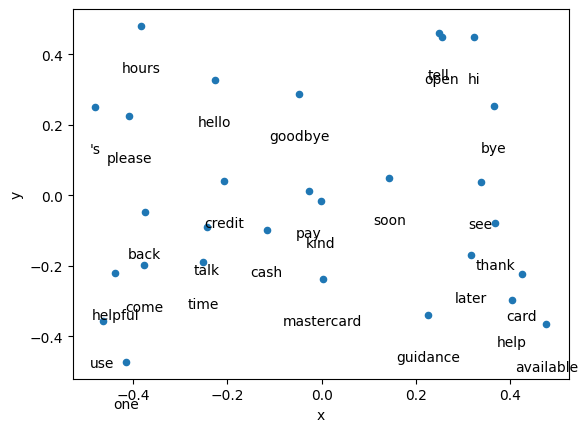

In [216]:
df1.plot(kind = 'scatter', x = 'x', y = 'y')
for i, row in df1.iterrows():
    plt.text(row['x'], row['y'] - 0.1, str(i), ha='center', va='top', fontsize=10)

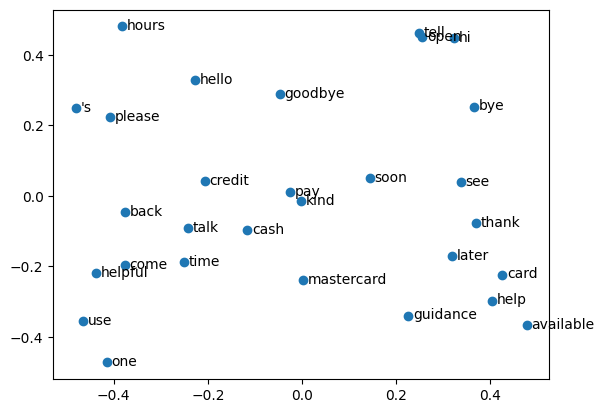

In [223]:
vf = df1.copy()
plt.scatter(vf['x'], vf['y'])
for i in words:
  plt.annotate(xy = (vf.loc[i, 'x'] + 0.01, vf.loc[i, 'y'] - 0.01), text = i)

In [220]:
cosine_similarity(df1.loc['cash'].values.reshape(1, -1), df1.loc['credit'].values.reshape(1, -1))

array([[0.62935936]], dtype=float32)

In [221]:
cosine_similarity(df1.loc['cash'].values.reshape(1, -1), df1.loc['goodbye'].values.reshape(1, -1))

array([[-0.50550663]], dtype=float32)

In [226]:
model.wv.most_similar('use')

[('time', 0.9999570250511169),
 ('cash', 0.999202311038971),
 ('come', 0.9853881001472473),
 ('helpful', 0.9823161959648132),
 ('one', 0.9804787039756775),
 ('talk', 0.9566819071769714),
 ('back', 0.862960696220398),
 ('kind', 0.6988083124160767),
 ('credit', 0.6598913669586182),
 ('mastercard', 0.6004158854484558)]

In [228]:
model.wv.doesnt_match(['use', 'one', 'come', 'hello', 'helpful'])

'hello'

In [ ]:
model.wv.doesnt_match(['use', 'one', 'come', 'hello', 'helpful'])